In [1]:
from datetime import datetime
import netCDF4 as nc
import numpy as np  
import matplotlib.pyplot as plt


In [2]:
# inputs for this tool are duration and area on the map for which the sunrise_sunset should be calculated
# and for which grid size
start_date = datetime(2015, 1, 1)
end_date = datetime(2015, 12, 31)

min_lat = -60
max_lat = 61
min_lon = -180
max_lon = 181

grid_size = 2

lons = np.arange(min_lon, max_lon, grid_size)  
lats = np.arange(min_lat, max_lat, grid_size)  
print(lats)
print(lons)



[-60 -58 -56 -54 -52 -50 -48 -46 -44 -42 -40 -38 -36 -34 -32 -30 -28 -26
 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10
  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46
  48  50  52  54  56  58  60]
[-180 -178 -176 -174 -172 -170 -168 -166 -164 -162 -160 -158 -156 -154
 -152 -150 -148 -146 -144 -142 -140 -138 -136 -134 -132 -130 -128 -126
 -124 -122 -120 -118 -116 -114 -112 -110 -108 -106 -104 -102 -100  -98
  -96  -94  -92  -90  -88  -86  -84  -82  -80  -78  -76  -74  -72  -70
  -68  -66  -64  -62  -60  -58  -56  -54  -52  -50  -48  -46  -44  -42
  -40  -38  -36  -34  -32  -30  -28  -26  -24  -22  -20  -18  -16  -14
  -12  -10   -8   -6   -4   -2    0    2    4    6    8   10   12   14
   16   18   20   22   24   26   28   30   32   34   36   38   40   42
   44   46   48   50   52   54   56   58   60   62   64   66   68   70
   72   74   76   78   80   82   84   86   88   90   92   94   96   98
  100  102  104  106  108  110  112  114 

In [3]:
project_data_path = '/nethome/manra003/atlanteco_plankton_plastic_nutrients_dispersion/data/'

sunrise_nc = nc.Dataset(project_data_path + 'SunriseTime_2x2_1d_2015.nc','r')
sunrise_nc #['time'][:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: File to store sunrise time in UTC with grid size of 2 x 2 degree
    history: Created 25/07/23
    dimensions(sizes): lon(181), lat(61), time(365)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(lon), float32 sunrise(time, lat, lon)
    groups: 

In [4]:
sunrise_nc['sunrise'][::].shape

(365, 61, 181)

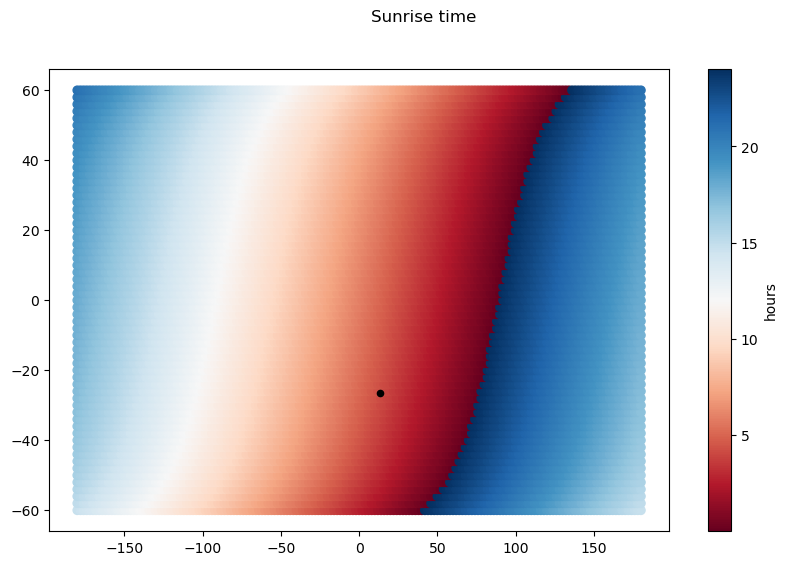

In [5]:
x,y=np.meshgrid(lons,lats)

day=1
fig=plt.figure(figsize=(10,6))
fig.suptitle('Sunrise time')

ax=plt.axes()
s=ax.scatter(x,y,c=sunrise_nc['sunrise'][day, :,:], cmap='RdBu', label="time")
cbar=plt.colorbar(s, ax=ax,label='hours')
ax.scatter(13.5,-26.5, s=20,c='k' )

# plt.colorbar(im, ax=ax, label='hours')


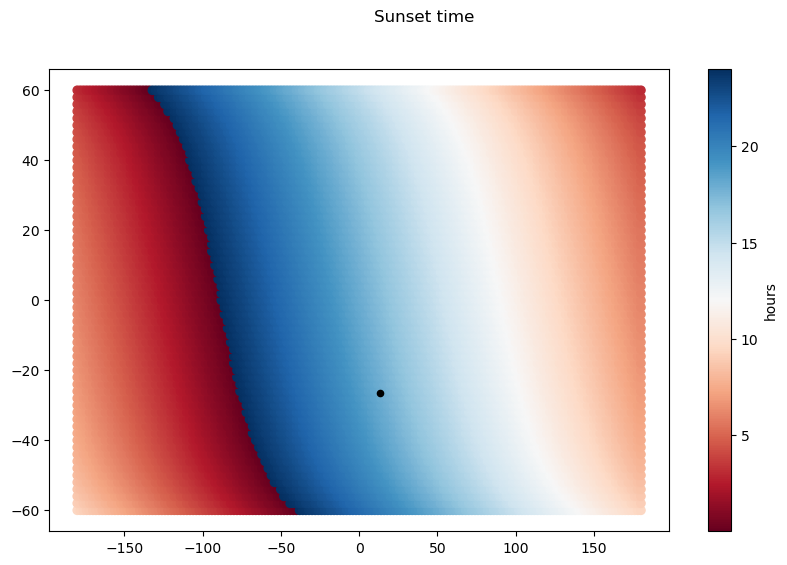

In [6]:
sunset_nc = nc.Dataset(project_data_path + 'SunsetTime_2x2_1d_2015.nc','r')

fig=plt.figure(figsize=(10,6))
fig.suptitle('Sunset time')

ax=plt.axes()
s=ax.scatter(x,y,c=sunset_nc['sunset'][day, :,:], cmap='RdBu', label="time")
cbar=plt.colorbar(s, ax=ax,label='hours')
ax.scatter(13.5,-26.5, s=20,c='k' )


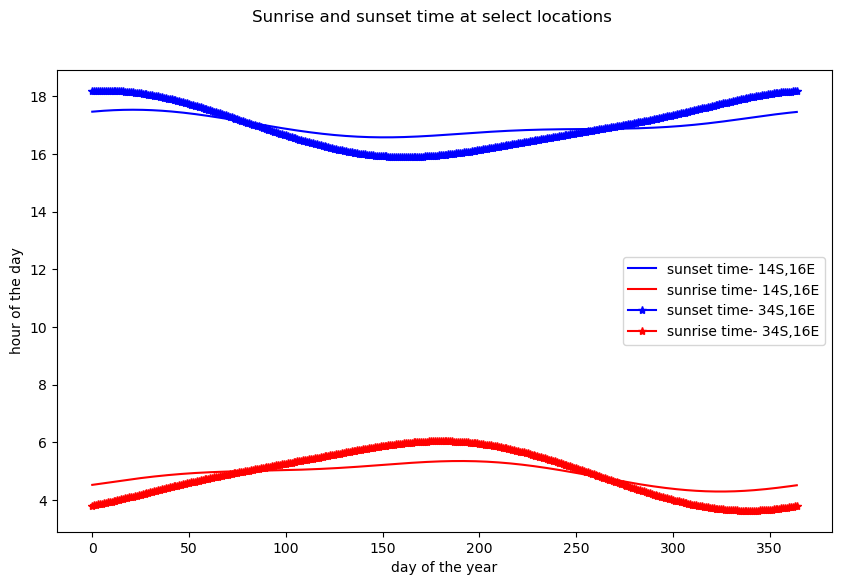

In [7]:
temp_lat=-14
temp_lon=16
lat_ind=np.where(lats==temp_lat)[0][0]
lon_ind=np.where(lons==temp_lon)[0][0]
sunrises= sunrise_nc['sunrise'][:,lat_ind,lon_ind]

sunsets= sunset_nc['sunset'][:,lat_ind,lon_ind]

fig=plt.figure(figsize=(10,6))
fig.suptitle('Sunrise and sunset time at select locations')

ax=plt.axes()
# s=ax.scatter(x,y,c=sunset_nc['sunset'][day, :,:], cmap='RdBu', label="time")
# cbar=plt.colorbar(s, ax=ax,label='hours')
ax.plot(sunsets, color='blue', label="sunset time- 14S,16E")
ax.plot(sunrises, color='red', label="sunrise time- 14S,16E")
ax.set_xlabel("day of the year")
ax.set_ylabel("hour of the day")

temp_lat=-34
lat_ind=np.where(lats==temp_lat)[0][0]
lon_ind=np.where(lons==temp_lon)[0][0]
sunrises= sunrise_nc['sunrise'][:,lat_ind,lon_ind]

sunsets= sunset_nc['sunset'][:,lat_ind,lon_ind]
ax.plot(sunsets, color='blue', marker="*",label="sunset time- 34S,16E")
ax.plot(sunrises, color='red', marker="*",label="sunrise time- 34S,16E")

plt.legend()


<h3> Now want to use Dawn/Dusk time for DVM migration cues. So, here I will compare the values between sunrise/sunset and dawn/dusk in this region.

In [8]:
dawn_nc = nc.Dataset(project_data_path + 'DawnTime_2x2_1d_2015.nc','r')
dusk_nc = nc.Dataset(project_data_path + 'DuskTime_2x2_1d_2015.nc','r')

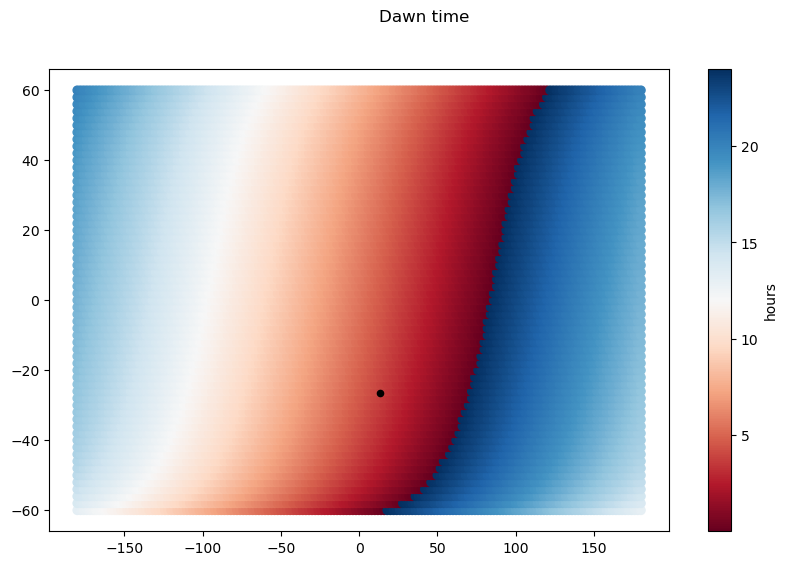

In [9]:
x,y=np.meshgrid(lons,lats)

day=1
fig=plt.figure(figsize=(10,6))
fig.suptitle('Dawn time')

ax=plt.axes()
s=ax.scatter(x,y,c=dawn_nc['dawn'][day, :,:], cmap='RdBu', label="time")
cbar=plt.colorbar(s, ax=ax,label='hours')
ax.scatter(13.5,-26.5, s=20,c='k' )


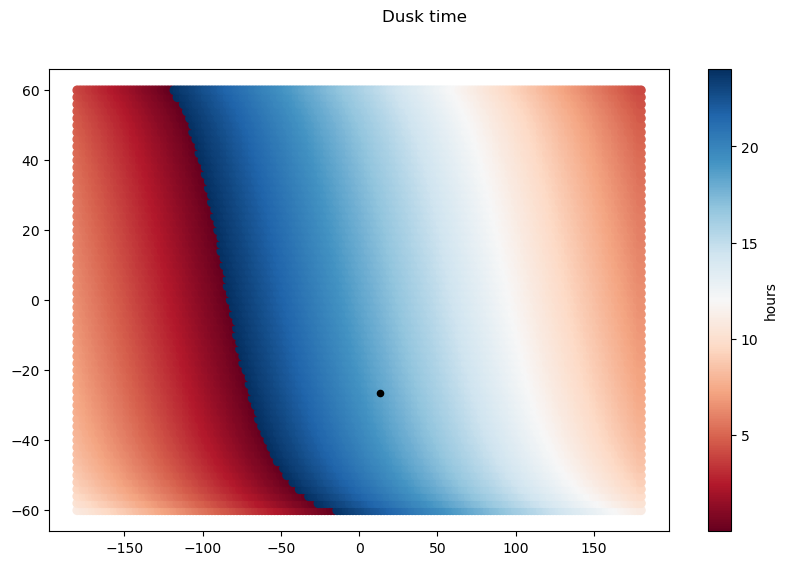

In [10]:
x,y=np.meshgrid(lons,lats)

day=1
fig=plt.figure(figsize=(10,6))
fig.suptitle('Dusk time')

ax=plt.axes()
s=ax.scatter(x,y,c=dusk_nc['dusk'][day, :,:], cmap='RdBu', label="time")
cbar=plt.colorbar(s, ax=ax,label='hours')
ax.scatter(13.5,-26.5, s=20,c='k' )

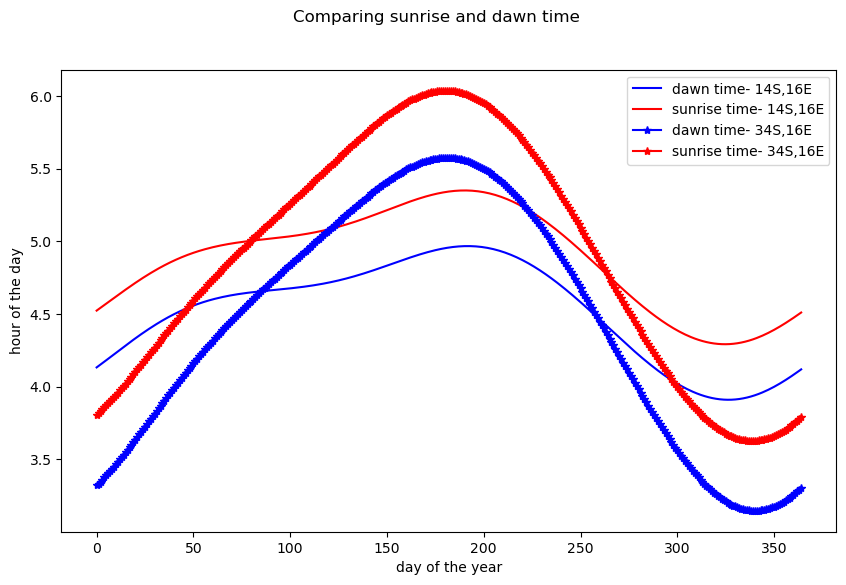

In [11]:
temp_lat=-14
temp_lon=16
lat_ind=np.where(lats==temp_lat)[0][0]
lon_ind=np.where(lons==temp_lon)[0][0]
sunrises= sunrise_nc['sunrise'][:,lat_ind,lon_ind]

dawns= dawn_nc['dawn'][:,lat_ind,lon_ind]

fig=plt.figure(figsize=(10,6))
fig.suptitle('Comparing sunrise and dawn time')
ax=plt.axes()
# s=ax.scatter(x,y,c=sunset_nc['sunset'][day, :,:], cmap='RdBu', label="time")
# cbar=plt.colorbar(s, ax=ax,label='hours')
ax.plot(dawns, color='blue', label="dawn time- 14S,16E")
ax.plot(sunrises, color='red', label="sunrise time- 14S,16E")
ax.set_xlabel("day of the year")
ax.set_ylabel("hour of the day")

temp_lat=-34
lat_ind=np.where(lats==temp_lat)[0][0]
lon_ind=np.where(lons==temp_lon)[0][0]
sunrises= sunrise_nc['sunrise'][:,lat_ind,lon_ind]

dawns= dawn_nc['dawn'][:,lat_ind,lon_ind]
ax.plot(dawns, color='blue', marker="*",label="dawn time- 34S,16E")
ax.plot(sunrises, color='red', marker="*",label="sunrise time- 34S,16E")

plt.legend()


In [26]:
diff=sunrises-dawns
diff.shape
np.min(diff), np.max(diff)

(0.41553974, 0.4870577)

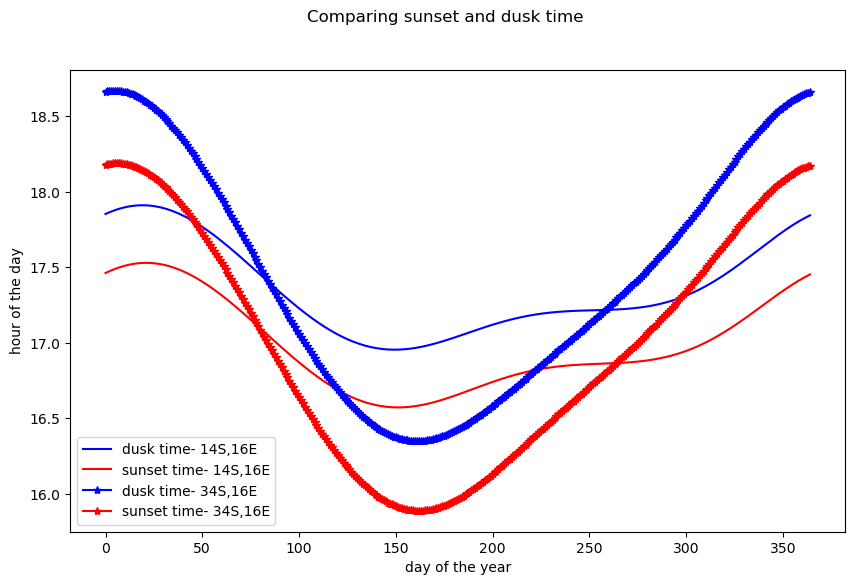

In [21]:
temp_lat=-14
temp_lon=16
lat_ind=np.where(lats==temp_lat)[0][0]
lon_ind=np.where(lons==temp_lon)[0][0]
sunsets= sunset_nc['sunset'][:,lat_ind,lon_ind]

dusks= dusk_nc['dusk'][:,lat_ind,lon_ind]
fig=plt.figure(figsize=(10,6))
fig.suptitle('Comparing sunset and dusk time')
ax=plt.axes()
ax.plot(dusks, color='blue', label="dusk time- 14S,16E")
ax.plot(sunsets, color='red', label="sunset time- 14S,16E")
ax.set_xlabel("day of the year")
ax.set_ylabel("hour of the day")

temp_lat=-34
lat_ind=np.where(lats==temp_lat)[0][0]
lon_ind=np.where(lons==temp_lon)[0][0]
sunsets= sunset_nc['sunset'][:,lat_ind,lon_ind]

dusks= dusk_nc['dusk'][:,lat_ind,lon_ind]

ax.plot(dusks, color='blue', marker="*",label="dusk time- 34S,16E")
ax.plot(sunsets, color='red', marker="*",label="sunset time- 34S,16E")

plt.legend()


In [24]:
diff=dusks-sunsets
diff.shape
np.min(diff), np.max(diff)


(0.4155388, 0.487051)

In [25]:
sunrise_nc.close()
sunset_nc.close()
dawn_nc.close()
dusk_nc.close()